# Introduction

"Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data."

*Kernel Density Estimation* By: Matthew Conlen 


  Bayes' theorem is a theorem about the conditional probability of random events A and B. Usually, the probability of event A under the condition of event B (occurrence) is not the same as the probability of event B under the condition of event A. However, there is a definite relationship between the two, and the Bayesian formula is a statement of this relationship: $$P\left(A|B\right)=\frac{P\left(B|A\right)\cdot P\left(A\right)}{P\left(B\right)}$$

where P(A|B) is the probability that A occurs if B occurs.

## Part 1

The purpose of this part is to predict the probability of a runner being a female at a given time by using one-dimensional KDE of male and female runners together with Bayes' theorem, and to examine the accuracy of these predictions.

In [952]:
import pandas as pd
# Pandas is a Python library for working with tabular data. The main objects it provides are Series and DataFrame.

from datetime import datetime
# The datetime module supplies classes for manipulating dates and times.

import seaborn as sns
# Seaborn is Python library for visualizing data. Seaborn uses matplotlib to create graphics

In [954]:
df = pd.read_csv("marathon_results.csv")
df['tot_minutes'] = pd.to_timedelta(df['Finish']).dt.total_seconds()/60
# Total finish time in minutes and add them in dataframe.

df['5K_minutes'] = pd.to_timedelta(df['5K']).dt.total_seconds()/60
# Total 5K time in minutes and add them in dataframe.

In [956]:
from scipy.stats import gaussian_kde
# Tools for computing KDE.

import numpy as np
# Numpy is a standard module for doing numerical computations in Python.

import matplotlib.pyplot as plt
# Plotly is a library for creating interactive plots.

In [847]:
dfm = df[df["M/F"] == 'M']
dff = df[df["M/F"] == 'F']

Get two DataFrames containing all rows containing "Male" and "Female" in column "M/F".

In [848]:
kdem = gaussian_kde(dfm['tot_minutes'])
kdef = gaussian_kde(dff['tot_minutes'])

Generate two kernel density estimation functions from data for male and female.

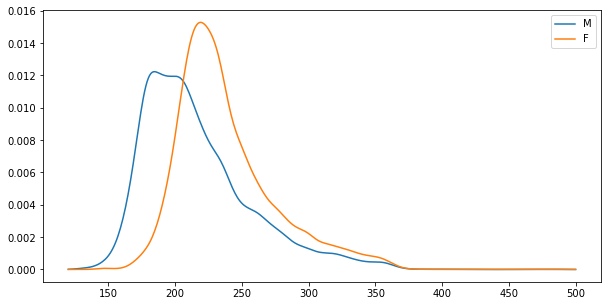

In [958]:
plt.figure(figsize=(10, 5))
x = np.linspace(120, 500, 400)
plt.plot(x, kdem(x), label='M')
plt.plot(x, kdef(x), label='F')
plt.legend()
plt.show()

This plot shows one-dimensional kernel density estimates for male and female runners based on finish time.

In [957]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.5)

Divide the data into training data and test data so that we can check the accuracy later

In [858]:
dfm1 = train_df[train_df["M/F"] == 'M']
dff1 = train_df[train_df["M/F"] == 'F']

Get two DataFrames containing all rows in the training data that contain "Male" and "Female" in the "M/F" column.

In [860]:
kde1 = gaussian_kde(train_df['tot_minutes'])
kdem1 = gaussian_kde(dfm1['tot_minutes'])
kdef1 = gaussian_kde(dff1['tot_minutes'])

Generate three kernel density estimation function from training data for training data, male data and female data.

In [863]:
def Bayes(time):
    numm = len(dfm1)
    numf = len(dff1)
    P_time = kdem1(time) + kdef1(time)
    Pf = (kdef1(time)) / P_time
    return Pf

The function *Bayes* is to use KDE and Bayes theorem to calculate the probability that the runner at a given time is female.

In [959]:
probability_list=[]
for i in range(len(test_df)):
    probability_list.append(Bayes(test_df["tot_minutes"].iloc[i]))

This is using test_data for testing and *probability_list* contains the probabilities of all predictions in the test data.

In [963]:
predict_list = []
for i in range(len(test_df)):
    if probability_list[i] > 0.5:
        predict_list.append("F")
    else:
        predict_list.append("M")

Predict whether a runner is male/female based on predicted probabilities and *predict_list* contains all predicted results

In [965]:
(predict_list == test_df['M/F']).sum()/len(test_df)
# Check accuracy of these predictions.

0.6538900296600502

The accuracy of using one-dimensional Kernel Density Estimation (KDE) based on finsh time and Bayes theorem to predict gender is approximately 65%

## Part 2

This part will use 2-dimensional KDEs computed using finish times and ages of runners, and use it together with the Bayes theorem to compute the probability that a runner with a given time was a female.

In [966]:
bw_method = 0.2  # Set bandwidth = 0.2
kdem2 = gaussian_kde(dfm1[["tot_minutes", "Age"]].T, bw_method=bw_method)
kdef2 = gaussian_kde(dff1[["tot_minutes", "Age"]].T, bw_method=bw_method)

Generate two kernel density estimation functions based on "tot_minutes" and "Age" from training_data for male and female.

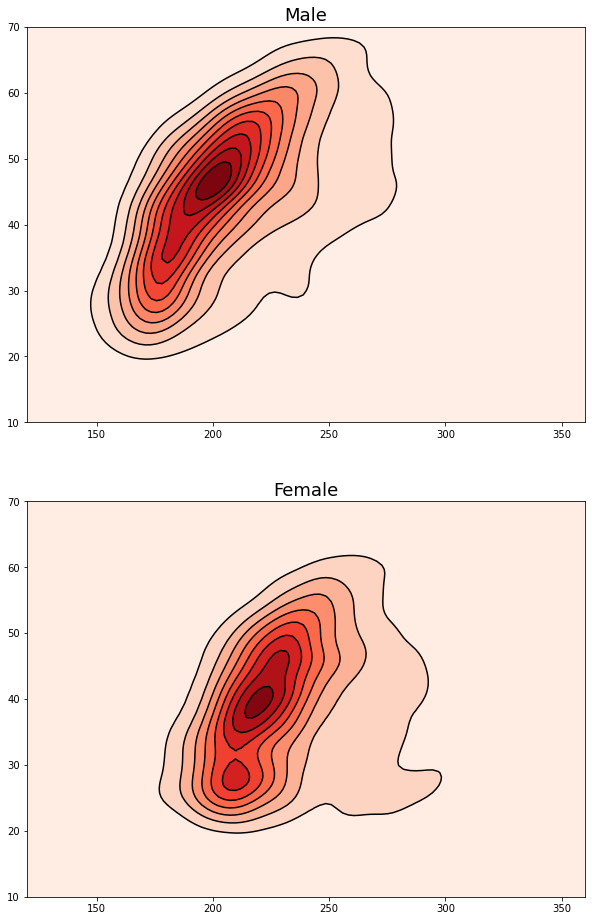

In [967]:
x = np.linspace(120, 360, 100)
y = np.linspace(10, 70, 100)

X, Y = np.meshgrid(x, y)
Z = kdem2([X.reshape(-1), Y.reshape(-1)]).reshape(X.shape)
Z2 = kdef2([X.reshape(-1), Y.reshape(-1)]).reshape(X.shape)

fig=plt.figure(num=1,figsize=(10,16))
ax1=fig.add_subplot(211)
ax1.set_title("Male",fontsize=18)
ax1.contourf(X, Y, Z, levels=10, cmap='Reds')
ax1.contour(X, Y, Z, levels=10, colors='k')


ax2=fig.add_subplot(212)
ax2.set_title("Female",fontsize=18)
ax2.contourf(X, Y, Z2, levels=10, cmap='Reds')
ax2.contour(X, Y, Z2, levels=10, colors='k')



The plot above shows a 2-dimensional KDE of male, which based on finish times and ages of runners.

The plot above shows a 2-dimensional KDE of female, which based on finish times and ages of runners.

In [ ]:
def Bayes2(time,age):
    numm = len(dfm1)
    numf = len(dff1)
    P_time = kdem2([time,age]) + kdef2([time,age])
    Pf = (kdef2([time,age])) / P_time
    return Pf

The function *Bayes2* is to use 2-dimensional KDE and Bayes theorem to calculate the probability that the runner at a given time is female.

In [972]:
probability_list2 = []
for i in range(len(test_df)):
    probability_list2.append(Bayes2(test_df["tot_minutes"].iloc[i],test_df["Age"].iloc[i]))

This is using test_data for testing and *probability_list* contains the probabilities of all predictions in the test data.

In [973]:
predict_list2 = []
for i in range(len(test_df)):
    if probability_list2[i] > 0.5:
        predict_list2.append("F")
    else:
        predict_list2.append("M")

Predict whether a runner is male/female based on predicted probabilities and *predict_list* contains all predicted results

In [974]:
(predict_list2 == test_df['M/F']).sum()/len(test_df)
# Check accuracy of these predictions.

0.7602099018936801

The accuracy of using 2-dimensional KDE based on finsh time and age and Bayes theorem to predict gender is approximately 76%, which is more accurate than the method in the part 1.

## Part 3

This part will use k-NN to make predictions for gender and compare the accuracy of the predictions obtained in part 1 and part 2.

In [975]:
from sklearn.neighbors import KNeighborsClassifier
# Tool for computing k-NN classification

In [989]:
def KNN(k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_df[['tot_minutes']], train_df['M/F'])
    knn_pred  = neigh.predict(test_df[['tot_minutes']])
    # Use test_data to make predictions and store the prediction results in knn_pred
    
    return knn_pred

The function *KNN* is to generate the classifier of k-NN with k neighbors, and train the train_data to return the prediction results.

In [996]:
(KNN(100) == test_df['M/F']).sum()/len(test_df)

0.6504677161761351

The accuracy of using k-NN to predict gender is approximately 65%,

In [1018]:
x = np.linspace(50,150,100)
y = []
for i in range(50,150):
    y.append((KNN(i) == test_df['M/F']).sum()/len(test_df))
y1 = [0.65389]*100
y2 = [0.7602099]*100

Record the accuracy of k-NN neighbors with 50-100 neighbors and compare with the accuracy in part1 and part2.

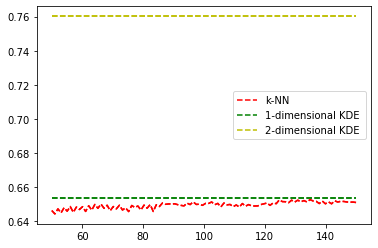

In [1023]:
plt.plot(x,y,'r--',x,y1,'g--',x,y2,'y--')
plt.plot(x, y,'r--', label='k-NN')
plt.plot(x, y1,'g--',label='1-dimensional KDE ')
plt.plot(x, y2,'y--',label='2-dimensional KDE ')
plt.legend()
plt.show()

The x-axis of this plot is the number of neighbors of k-NN, and the y-axis is the accuracy.

When the number of neighbors is larger, the accuracy of k-NN is higher, which is close to the accuracy of 1-dimensional KDE. 2-dimensional KDE has the highest accuracy.

## Part 4

The linear regression prediction method means that the relationship between the dependent variable and the independent variable is linear. A linear regression line has an equation of the form: $$Y=bx+a+e$$

where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, a is the intercept and e is the error of regression.

The purpose of this part is to use linear regression to predict runners' finish times based on their 5K times. And evaluate the accuracy of these predictions. Then use linear regression with 5K times to predict completion times using data other than 5K times.

In [1048]:
from sklearn.linear_model import LinearRegression
# Import Linear Model.

reg = LinearRegression()
# Generate linear regression function.

In [1049]:
reg.fit(train_df[['5K_minutes']], train_df['tot_minutes'])
# Use linear regression to predict runners' finish times based on their 5K times

LinearRegression()

In [1044]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.5)

In [1045]:
test_df['regression'] = reg.predict(test_df[['5K_minutes']])

<ipython-input-1045-28367a1f5eb5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This is using test_data for testing and store the prediction results in *test_df['regression']*.

In [1046]:
test_df['regression_error'] = test_df['regression'] - test_df['tot_minutes']

<ipython-input-1046-7dfc7c0f6ef5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Storing the error of regression in *test_df['regression_error']*

In [1062]:
reg.score(test_df[['5K_minutes']], test_df['tot_minutes'])
# calculate accuracy score

0.8415811115184746

The accuracy of using k-NN to predict gender is approximately 65%,

In [1054]:
np.abs(test_df['regression_error']).describe()

count    13149.000000
mean        10.972957
std         11.540483
min          0.000783
25%          3.759800
50%          7.841444
75%         13.741909
max        148.993838
Name: regression_error, dtype: float64

A total of 13149 data were predicted, the average error of the data was about 10.89, the variance of the error was about 11.43, the minimum error was 0.000269, and the maximum error was 147.943177.

25% means less than 25% regression error below 3.718883.

50% means less than 50% regression error below 7.777086.

75% means less than 75% regression error below 13.655317.

In [1055]:
reg2 = LinearRegression()
reg2.fit(test_df[['5K_minutes', 'Age']], test_df['tot_minutes'])
# Use linear regression to predict runners' finish times based on their 5K times and ages.

LinearRegression()

In [1058]:
test_df['regression_2'] = reg2.predict(test_df[['5K_minutes', 'Age']])

<ipython-input-1058-d5732b37ce70>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This is using test_data for testing and store the prediction results in test_df['regression_2'].

In [1059]:
test_df['regression_2_error'] = test_df['regression_2'] - test_df['tot_minutes']

<ipython-input-1059-f0b81cc857a2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Storing the error of regression in test_df['regression_2 error']

In [1064]:
reg2.score(test_df[['5K_minutes', 'Age']], test_df['tot_minutes'])
# calculate accuracy score

0.8432463275163371

In [1060]:
np.abs(test_df[['regression_error', 'regression_2_error']]).describe()

,regression_error,regression_2_error
count,13149.000000,13149.000000
mean,10.972957,10.914436
std,11.540483,11.482213
min,0.000783,0.002728
25%,3.759800,3.808305
50%,7.841444,7.801638
75%,13.741909,13.763582
max,148.993838,150.464273


The two methods predict the same set of data. Compared with the first method, the second method has a slight reduction in the mean error and 75%, all other errors increase. 

The accuracy score of the first method is 0.8415811115184746.

The accuracy score of the second method is 0.8432463275163371.
They are not very different

Thus, using linear regression based on 5K times and the runner's ages to predict finish time did not improve much the prediction.

## Part 5

For this part I want to calculate a 1-demensional KDE for male and female runners using 30K times and use it with Bayes' theorem to calculate the probability that a runner at a given time is a male.

In [1066]:
df1 = pd.read_csv("marathon_results.csv")
df1['30K_minutes'] = pd.to_timedelta(df['30K']).dt.total_seconds()/60
# Total 30K time in minutes and add them in dataframe.

In [1068]:
dfm30 = df1[df1["M/F"] == 'M']
dff30 = df1[df1["M/F"] == 'F']
# Get two DataFrames containing all rows containing "Male" and "Female" in column "M/F".

In [1070]:
kdem30 = gaussian_kde(dfm30['30K_minutes'])
kdef30 = gaussian_kde(dff30['30K_minutes'])
# Generate two kernel density estimation functions from data for male and female.

In [1082]:
train_df30, test_df30 = train_test_split(df1, test_size=0.5)

In [1083]:
dfm30 = train_df30[train_df30["M/F"] == 'M']
dff30 = train_df30[train_df30["M/F"] == 'F']

In [1084]:
kde30 = gaussian_kde(train_df30['30K_minutes'])
kdem30 = gaussian_kde(dfm30['30K_minutes'])
kdef30 = gaussian_kde(dff30['30K_minutes'])

In [1085]:
def Bayes30(time):
    numm = len(dfm30)
    numf = len(dff30)
    P_time = kdem30(time) + kdef30(time)
    Pf = (kdef30(time)) / P_time
    return Pf

The function *Bayes30* is to use KDE and Bayes theorem to calculate the probability that the runner at a given 30K time is female.

In [1086]:
probability_list30=[]
for i in range(len(test_df30)):
    probability_list30.append(Bayes30(test_df30["30K_minutes"].iloc[i]))

This is using *test_data30* for testing and *probability_list30* contains the probabilities of all predictions in the test data.

In [1087]:
predict_list30 = []
for i in range(len(test_df30)):
    if probability_list30[i] > 0.5:
        predict_list30.append("F")
    else:
        predict_list30.append("M")

Predict whether a runner is male/female based on predicted probabilities and *predict_list30* contains all predicted results

In [1088]:
(predict_list30 == test_df30['M/F']).sum()/len(test_df30)

0.6660582553806373

The accuracy of using 1-dimensional KDE based on 30K time and Bayes theorem to predict gender is approximately 66.6%, which is more accurate than using 1-dimensional KDE based on finish time.

# Conclusion

From the report I can conclude that the method using 2-dimentional KDE and Bayes theorem has the highest accuracy in predicting gender, and the method using k-NN has the lowest accuracy in predicting gender. Using linear regression to predict runners' finish times based on their 5K time and age does not improve linear regression predictions very well.